In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
% matplotlib inline

In [6]:
#Import data 
tweets_df = pd.read_csv('twitter_dataframe3.csv')
tweets_df.head()

,Unnamed: 0,contributors,coord,coordinates,country,created_at,display_text_range,entities,extended_entities,extended_tweet,...,user,user_display_name,user_favourites_count,user_followers_count,user_friends_count,user_language,user_location_name,user_screen_name,user_statuses_count,user_verfied
0,0,NaN,NaN,NaN,United States,Sun Mar 31 14:32:21 +0000 2019,NaN,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,{'full_text': 'Barr is corrupt and he needs to...,...,"{'id': 3885506301, 'id_str': '3885506301', 'na...",Marie Maduemezia,807,23,116,en,"Albany, NY",MarieMaduemezi1,596,False
1,1,NaN,NaN,NaN,Canada,Sun Mar 31 14:32:23 +0000 2019,NaN,"{'hashtags': [{'text': 'snow', 'indices': [124...",NaN,NaN,...,"{'id': 2199856812, 'id_str': '2199856812', 'na...",Mike,219,2011,2194,en,Hamilton Ontario,MikeDaddyReal,775,False
2,2,NaN,NaN,NaN,Canada,Sun Mar 31 14:32:27 +0000 2019,"[0, 77]","{'hashtags': [{'text': 'HamOnt', 'indices': [4...","{'media': [{'id': 1112362014494490629, 'id_str...",NaN,...,"{'id': 1202255588, 'id_str': '1202255588', 'na...",Gary Yokoyama,264,1494,523,en,"Hamilton,Ontario",Yokoatthespec,2202,False
3,3,NaN,NaN,NaN,United States,Sun Mar 31 14:32:28 +0000 2019,"[27, 57]","{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,NaN,...,"{'id': 17695016, 'id_str': '17695016', 'name':...",NYFarmer,83037,27296,29841,en,New York State,NYFarmer,222317,False
4,4,NaN,NaN,NaN,United States,Sun Mar 31 14:32:33 +0000 2019,NaN,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,NaN,...,"{'id': 2819120790, 'id_str': '2819120790', 'na...",Carol Schneider,2830,90,321,en,"Dundee, NY",OneeghaCarol,854,False


In [5]:
tweets_df.shape

(1504, 50)

In [17]:
#See what columns exist in dataframe
tweets_df.columns

Index(['Unnamed: 0', 'contributors', 'coord', 'coordinates', 'country',
       'created_at', 'display_text_range', 'entities', 'extended_entities',
       'extended_tweet', 'extended_tweet-full_text', 'favorite_count',
       'favorited', 'filter_level', 'geo', 'id', 'id_str',
       'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'location_city',
       'location_name', 'place', 'possibly_sensitive', 'quote_count',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status_permalink', 'reply_count', 'retweet_count', 'retweeted',
       'source', 'text', 'timestamp_ms', 'truncated', 'user',
       'user_display_name', 'user_favourites_count', 'user_followers_count',
       'user_friends_count', 'user_language', 'user_location_name',
       'user_screen_name', 'user_statuses_count', 'user_verfied'],
      dtype='object')

In [173]:
#Oldest tweet in dataframe was collected on March 31, 2019
tweets_df['created_at'].min()

'Sun Mar 31 14:32:21 +0000 2019'

In [174]:
#Newest tweet in dataframe was collected on April 03, 2019 
tweets_df['created_at'].max()

'Wed Apr 03 02:59:04 +0000 2019'

In [150]:
#Filter out columns that aren't user-specific
twitter_users = tweets_df[['user_screen_name','user_display_name', 'user_statuses_count', 'user_favourites_count', 'user_followers_count', 'user_friends_count', 'user_language', 'location_city', 'user_verfied']]
twitter_users.head()

,user_screen_name,user_display_name,user_statuses_count,user_favourites_count,user_followers_count,user_friends_count,user_language,location_city,user_verfied
0,MarieMaduemezi1,Marie Maduemezia,596,807,23,116,en,NaN,False
1,MikeDaddyReal,Mike,775,219,2011,2194,en,Hamilton,False
2,Yokoatthespec,Gary Yokoyama,2202,264,1494,523,en,Hamilton,False
3,NYFarmer,NYFarmer,222317,83037,27296,29841,en,NaN,False
4,OneeghaCarol,Carol Schneider,854,2830,90,321,en,NaN,False


In [151]:
#Deleted duplicated users 
filtered_users = twitter_users.drop_duplicates(subset='user_screen_name', keep='first', inplace=False)

In [152]:
#Check to ensure that only user-specific columns remain
filtered_users.columns

Index(['user_screen_name', 'user_display_name', 'user_statuses_count',
       'user_favourites_count', 'user_followers_count', 'user_friends_count',
       'user_language', 'location_city', 'user_verfied'],
      dtype='object')

In [153]:
#check to see how many rows exist for each column 
filtered_users.sort_values('user_statuses_count', ascending=False).count()

user_screen_name         483
user_display_name        483
user_statuses_count      483
user_favourites_count    483
user_followers_count     483
user_friends_count       483
user_language            483
location_city            358
user_verfied             483
dtype: int64

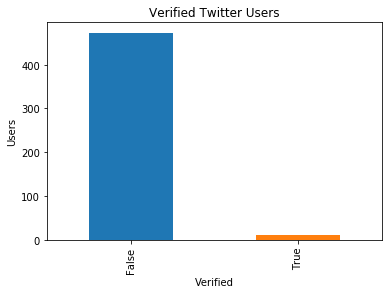

In [154]:
#See how many users are verified vs not
filtered_users.user_verfied.value_counts()
filtered_users.user_verfied.value_counts().plot.bar()
plt.title('Verified Twitter Users')
plt.xlabel('Verified')
plt.ylabel('Users')
plt.show()

In [164]:
#See how many tweets originated in which cities 
locations = filtered_users.groupby('location_city').sum()[['user_statuses_count']]
locations

,user_statuses_count
location_city,
Ajax,109136
Brampton,584500
Hamilton,353224
Markham,24377
Mississauga,326162
Oakville,86174
Oshawa,7719
Pickering,17357
Richmond Hill,24165


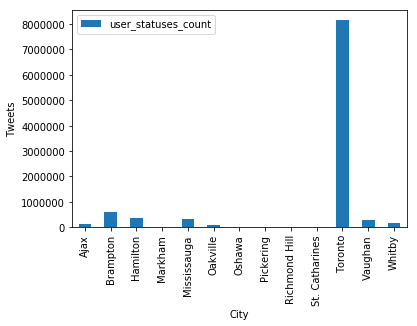

In [168]:
#Visualise the tweets/city ratios 
locations.plot.bar()
plt.xlabel('City')
plt.ylabel('Tweets')
plt.show()

In [201]:
#Group tweets by language
languages = filtered_users.groupby('user_language').sum()[['user_statuses_count']]
languages

,user_statuses_count
user_language,
ar,11424
en,16471983
en-gb,5645
es,394916
ja,3253
pt,121554
th,4631
zh-CN,2918


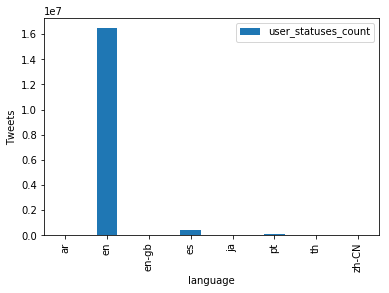

In [202]:
#Visualise the tweets/city ratios 
languages.plot.bar()
plt.xlabel('language')
plt.ylabel('Tweets')
plt.show()

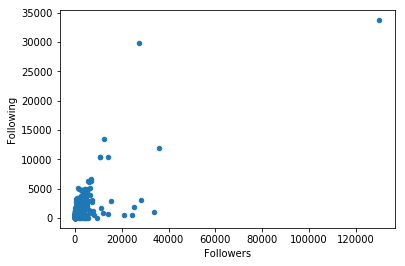

In [175]:
#See friends vs. follower counts by user
filtered_users.plot.scatter(x='user_followers_count',y='user_friends_count')
plt.xlabel('Followers')
plt.ylabel('Following')
plt.show()

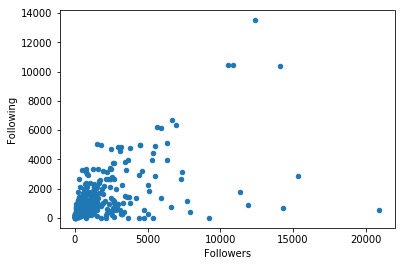

In [176]:
#Remove the outliers so we can better see distribution of data
new_users = filtered_users[np.abs(filtered_users.user_followers_count-filtered_users.user_followers_count.mean()) <= (3*filtered_users.user_followers_count.std())]
new_users.plot.scatter(x='user_followers_count',y='user_friends_count')
plt.xlabel('Followers')
plt.ylabel('Following')
plt.show()

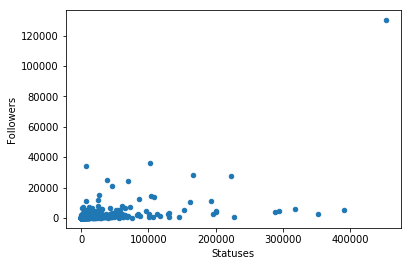

In [177]:
#See if status count impacts follower count
#Outliers have been removed 
statuses = filtered_users[np.abs(filtered_users.user_statuses_count-filtered_users.user_statuses_count.mean()) <= (3*filtered_users.user_statuses_count.std())]
statuses.plot.scatter(x='user_statuses_count',y='user_followers_count')
plt.xlabel('Statuses')
plt.ylabel('Followers')
plt.show()

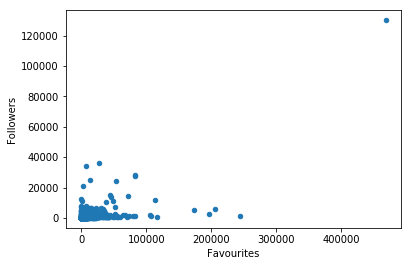

In [207]:
#See if favouriting impacts follower count
#Outliers have been removed 
favourites = filtered_users[np.abs(filtered_users.user_favourites_count-filtered_users.user_favourites_count.mean()) <= (3*filtered_users.user_favourites_count.std())]
statuses.plot.scatter(x='user_favourites_count',y='user_followers_count')
plt.xlabel('Favourites')
plt.ylabel('Followers')
plt.show()